# Het Hagelsteen vermoeden

![alt](http://i.stack.imgur.com/4hBXf.png)

##### door: Yaleesa Borgman
##### Datum: 16 mei 2016


## Intro - Carl Friedrich Gauss

- Wiskundige (en meer) geboren in 1777
- Kwam met deze sequence waarbij je altijd bij 1 kon eindigen
- Niemand heeft ooit uit kunnen vogelen of dit ook werkelijk klopt

De regel luid:

![alt](https://upload.wikimedia.org/math/b/b/d/bbdeefe430e05195dc5e47f1302a694f.png)


## Simpele simulatie met python!

In [1]:
def hagelsteen(n):
    '''Given an natural number, if its even, it devided by 2, 
    if not its multiplyed by 3 + 1, repeat until its down to 1'''
    if type(n) == int:
        retList = [n]
        while n != 1:
            if n % 2 == 0:
    #             even
                n = n/2
            else:
    #             odd
                n = n * 3 + 1
            retList.append(n)

        return retList
    else:
        print "error, not an integer"
        

output = hagelsteen(6)
print output, 'Stappen:', len(output)-1

[6, 3, 10, 5, 16, 8, 4, 2, 1] Stappen: 8


## Plotje van het aantal stappen

- 6 is de 0'de stap
- Schiet omhoog 
- maar na 8 stappen is hij bij 1

* lager getal dan 8 in het vorige voorbeeld, maar doet er langer over om bij 1 te komen

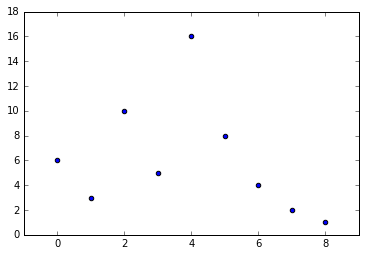

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def hagelsteenplotje(n):
    lijst = hagelsteen(n) 
    plt.scatter(range(0,len(lijst)),lijst)

hagelsteenplotje(6)

## Slimmere implementatie in python

* opzoek naar een snellere/slimmere manier om dit te berekenen:
    1. Stappen opslaan in een dictionary 
    2. Recursief 
    3. Lijsten opslaan in een dictionary



## Stappen opslaan in dictionary

- De bedoeling is dat de dictionary zich vult zich met informatie, hoe voller deze word, hoe slimmer hij zal zijn.
- De functie kijkt of het getal die uitgerekend moet worden al een keer is uitgerekend, zo ja, weet hij ook de stappen die erbij horen. Die vult hij dus aan.

In [12]:
import pprint

steenDict = {}
def slimmeHagel(n):
    global steenDict
    l = 1
    while n is not 1:
        if n in steenDict:
            l += steenDict[n]
            break
        else:
            if n % 2 == 0:
                n = n / 2
            else:
                n = n * 3 + 1
            l += 1
    return l - 1

steenDict[6] = slimmeHagel(6)
steenDict[4] = slimmeHagel(4)
steenDict[8] = slimmeHagel(8)
print steenDict


{8: 3, 4: 2, 6: 8}


## Plot voor de slimmere functie met k = 1000

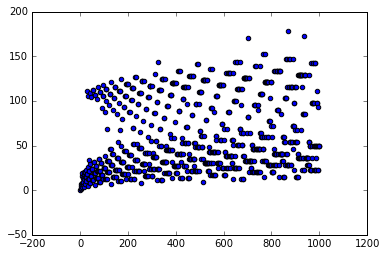

In [41]:
steenDict = {}
def testLijst(k):    
    for i in range(1,k):
        l = slimmeHagel(i)
        steenDict[i] = l
    x = range(1,len(steenDict)+1)
    y = [steenDict[k] for k in steenDict]
    return x, y

x,y = testLijst(1000)
plt.scatter(x,y)

## Misschien is recursief wel sneller?

- omdat de code korter is, gaat het gevoel uit dat de functie ook sneller zijn taken zal doen, dit is echter niet het geval (zoals later blijkt in de snelheid vergelijking)

In [29]:
def recursiveHagel(n):
    if n == 1:
        return 1
    elif n % 2 == 0:
        return 1 + recursiveHagel(n / 2)
    else:
        return 1 + recursiveHagel(n * 3 + 1)

recursiveHagel(6) -1

8

## Lijsten met getallenreeks opslaan in dictionary

In [23]:
steenDict = {}

def nogSlimmereHagel(n):
    global steenDict
    lijst = []
    if n not in steenDict:
        while n is not 1:
            if n in steenDict:
                lijst = lijst + steenDict[n]
                break
            else:
                lijst.append(n)
                if n % 2 == 0:
                    n = n / 2
                else:
                    n = n * 3 + 1
    if 1 not in lijst:
        lijst.append(1)
    return lijst


def parseHagelLijst(lijst):
    global steenDict
    for i,x in enumerate(lijst):
        if x not in steenDict:
            steenDict[x] = lijst[i:]


parseHagelLijst(nogSlimmereHagel(3))

print steenDict



{1: [1], 2: [2, 1], 3: [3, 10, 5, 16, 8, 4, 2, 1], 4: [4, 2, 1], 5: [5, 16, 8, 4, 2, 1], 8: [8, 4, 2, 1], 10: [10, 5, 16, 8, 4, 2, 1], 16: [16, 8, 4, 2, 1]}


## Snelheden vergelijken!

- Optie 1, orginele manier, is het langzaamst
- Optie 2, stappen opslaan in een dictionary lijkt het snelst te gaan
- Optie 3, opslaan met lijsten is wel slimmer qua data structuur, maar zeker niet sneller.
- Optie 4, recursief, zoals eerder gezegd niet sneller dan de rest.

In [36]:
steenDict = {}
def testLijst(k, method):
    global steenDict
    steenDict = {}
    if method == "slimmer":
        for i in range(1,k+1):
            parseHagelLijst(nogSlimmereHagel(i))
    elif method == "slim":
        for i in range(1,k+1):
            steenDict[i] = slimmeHagel(i)
    elif method == "dom":
        for i in range(1,k+1):
            steenDict[i] = hagelsteen(i)
    elif method == 'rec':
        for i in range(1, k+1):
            steenDict[i] = recursiveHagel(i)
    else:
        print 'dom, slim, slimmer, rec'



%time testLijst(1000, 'dom')
%time testLijst(1000, 'slim')
%time testLijst(1000, 'slimmer')
%time testLijst(1000, 'rec')


CPU times: user 27.2 ms, sys: 10.4 ms, total: 37.6 ms
Wall time: 30.5 ms
CPU times: user 4.81 ms, sys: 1.28 ms, total: 6.1 ms
Wall time: 5.42 ms
CPU times: user 13.7 ms, sys: 439 µs, total: 14.2 ms
Wall time: 15 ms
CPU times: user 20.1 ms, sys: 368 µs, total: 20.4 ms
Wall time: 20.9 ms


## Rekenen van stappen naar kleinste getal

In [ ]:
def totN(n):
    global steenDict
    count = 0
    l = 0
    while l is not n:
#         if count % 1000000 == 0:
#             print '.',
        if count > 100000:
            return False
        count += 1
        l = slimmeHagel(count)
        steenDict[count] = l
    return count
        
# for i in range(300,900):
#     b = totN(i)
#     if b:
#         print "\n",i, totN(i),
#     else:
#         print '.',
    
    
# print slimmeHagel(totN(200))



